In [8]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [5]:
train_dataset = datasets.MNIST(
    root = './data',
    train=True,
    transform = transforms.Compose([transforms.ToTensor()]),
    download = True
    
)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/Users/distiller/project/conda/conda-bld/pytorch_1587428061935/work/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [6]:
len(train_dataset)

60000

In [7]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [37]:
train_dataset[0][0].shape,train_dataset[0][1]

(torch.Size([1, 28, 28]), 5)

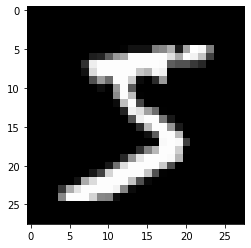

In [14]:
plt.imshow(train_dataset[0][0].view(28,28), cmap)

In [13]:
type(train_dataset[0])

tuple

In [15]:
test_dataset = datasets.MNIST(
    root = './data',
    train=False,
    transform = transforms.Compose([transforms.ToTensor()]),
    download = True
    
)

In [16]:
len(test_dataset)

10000

In [19]:
test_dataset[0][0].shape

torch.Size([1, 28, 28])

When the model goes through the whole 60k images once, learning how to classify 0-9, it's consider 1 epoch.

However, there's a concept of batch size where it means the model would look at 100 images before updating the model's weights, thereby learning. When the model updates its weights (parameters) after looking at all the images, this is considered 1 iteration.


We arbitrarily set 3000 iterations here which means the model would update 3000 times. 

In [20]:
batch_size = 100
n_iters = 3000

One epoch consists of 60,000 / 100 = 600 iterations. Because we would like to go through 3000 iterations, this implies we would have 3000 / 600 = 5 epochs as each epoch has 600 iterations. 

In [23]:
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

# Data Loader

In [24]:
train_loader = torch.utils.data.DataLoader(
dataset = train_dataset,
batch_size = batch_size,
shuffle=True
)

### Check Iterability

In [26]:
import collections.abc
isinstance(train_loader,collections.Iterable)

True

In [27]:
test_loader = torch.utils.data.DataLoader(
    dataset = test_dataset,
    batch_size = batch_size,
    shuffle = False
)

In [28]:
isinstance(test_loader,collections.Iterable)

True

## Model

In [29]:
class LogisticRegressionModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super().__init__()
        
        self.linear = nn.Linear(input_dim,output_dim)
        
    def forward(self,x):
        out = self.linear(x)
        return out

Unlike linear regression, we do not use MSE here, we need Cross Entry Loss to calculate our loss before we backpropagate and update our parameters.

It does 2 things at the same time.


1. Computes softmax (logistic/softmax function)
2. Computes cross entropy

In [32]:
input_dim = 28*28
output_dim = 10
model = LogisticRegressionModel(input_dim, output_dim)

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

Process

   1. Convert inputs/labels to tensors with gradients
   2. Clear gradient buffets
   3.  Get output given inputs
   4.  Get loss
   5. Get gradients w.r.t. parameters
   6. Update parameters using gradients
        * parameters = parameters - learning_rate * parameters_gradients
   7. REPEAT


In [47]:
iter = 0
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        #Load images as a variable
        images = images.view(-1,28*28).requires_grad_()
        labels = labels
        print(labels)
        print("Size of the labels:",labels.size(0))
        break   

tensor([7, 1, 7, 9, 0, 1, 7, 8, 2, 2, 1, 0, 8, 3, 4, 1, 0, 7, 3, 7, 9, 9, 8, 4,
        4, 6, 3, 0, 8, 8, 8, 5, 1, 6, 1, 2, 0, 2, 5, 8, 3, 7, 7, 0, 7, 1, 7, 4,
        1, 2, 9, 1, 3, 4, 0, 7, 4, 3, 1, 6, 3, 5, 0, 3, 7, 5, 2, 8, 3, 9, 6, 0,
        5, 0, 2, 2, 3, 4, 2, 8, 1, 5, 2, 6, 2, 2, 6, 2, 0, 0, 9, 8, 9, 6, 1, 1,
        7, 2, 8, 6])
Size of the labels: 100
tensor([8, 0, 4, 1, 5, 9, 8, 7, 0, 8, 0, 1, 3, 5, 9, 6, 6, 2, 5, 6, 9, 1, 8, 3,
        7, 1, 1, 5, 5, 6, 9, 3, 3, 4, 4, 2, 2, 2, 0, 0, 3, 6, 3, 1, 0, 2, 0, 3,
        7, 3, 1, 4, 5, 0, 7, 1, 6, 9, 3, 7, 0, 5, 5, 3, 3, 6, 3, 9, 8, 1, 3, 5,
        2, 4, 0, 3, 1, 0, 8, 6, 1, 7, 8, 4, 2, 7, 9, 1, 4, 7, 8, 1, 0, 5, 4, 9,
        5, 9, 6, 8])
Size of the labels: 100
tensor([1, 7, 1, 3, 9, 6, 7, 1, 4, 7, 7, 1, 5, 1, 2, 1, 4, 7, 0, 2, 5, 2, 7, 7,
        0, 5, 1, 9, 2, 0, 9, 2, 3, 8, 2, 9, 7, 9, 9, 3, 1, 4, 0, 0, 7, 1, 0, 6,
        1, 4, 8, 1, 4, 4, 9, 8, 3, 3, 7, 3, 4, 9, 6, 4, 2, 4, 0, 1, 3, 9, 1, 8,
        5, 0, 3, 7, 4, 9, 7, 7

# Train Model

In [50]:
iter = 0
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        #Load images as a variable
        images = images.view(-1,28*28).requires_grad_()
        labels = labels
         
        #Clear gradients
        optimizer.zero_grad()
        #Forward pass
        outputs = model(images)
        # Calculate Loss:softmax --> cross entropy loss
        loss = criterion(outputs,labels)
        #Getting gradients
        loss.backward()
        # Updating Paramters
        optimizer.step()
        
        iter+=1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


/Users/distiller/project/conda/conda-bld/pytorch_1587428061935/work/aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


Iteration: 500. Loss: 1.4773257970809937. Accuracy: 74
Iteration: 1000. Loss: 1.3323805332183838. Accuracy: 78
Iteration: 1500. Loss: 1.1699851751327515. Accuracy: 80
Iteration: 2000. Loss: 1.0728095769882202. Accuracy: 81
Iteration: 2500. Loss: 1.020339012145996. Accuracy: 82
Iteration: 3000. Loss: 0.8691763281822205. Accuracy: 83


In [51]:
save_model = True
if save_model is True:
    # Saves only parameters
    torch.save(model.state_dict(), 'mnist_model.pkl')